<a href="https://colab.research.google.com/github/jovanadobreva/Labs-I2DS/blob/main/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees and Gradient Boosting

## Setting up the Environment

For this laboratory exercise, you will need to install the Anaconda package & environment manager. We will install a minimal distribution, [Miniconda](https://docs.conda.io/projects/miniconda/en/latest/). Choose the adequate distribution for your operating system, download and install it.

Or use the following commands:

### Windows
```shell
curl https://repo.anaconda.com/miniconda/Miniconda3-latest-Windows-x86_64.exe -o miniconda.exe
start /wait "" miniconda.exe /S
del miniconda.exe
```

### Linux
```shell
mkdir -p ~/miniconda3
wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh -O ~/miniconda3/miniconda.sh
bash ~/miniconda3/miniconda.sh -b -u -p ~/miniconda3
rm -rf ~/miniconda3/miniconda.sh
```

### macOS

```shell
mkdir -p ~/miniconda3
curl https://repo.anaconda.com/miniconda/Miniconda3-latest-MacOSX-arm64.sh -o ~/miniconda3/miniconda.sh
bash ~/miniconda3/miniconda.sh -b -u -p ~/miniconda3
rm -rf ~/miniconda3/miniconda.sh
```

For both Linux and macOS after installing, initialize your newly-installed Miniconda. The following commands initialize for bash and zsh shells:

```shell
~/miniconda3/bin/conda init bash
~/miniconda3/bin/conda init zsh
```


Once you have installed miniconda, run the following commands to create an environment:
```bash
conda create --name myenv
```

'myenv' is the name of the environment, you can change the name however you want.

When conda asks you to proceed, type y

After successfully creating the environment, activate it with the following command:
```bash
conda activate myenv
```

For more detailed information you can read the [documentation](https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#creating-an-environment-with-commands).

Now, once the environment is activated, proceed to install the required libraries.

```bash
pip install numpy pandas scikit-learn xgboost matplotlib seaborn gdown
```

In the next step, we need to add the environment to jupyter. Use the following commands to install ipykernel and add the environment to ipykernel.

```bash
pip install ipykernel
```
```bash
python -m ipykernel install --name=myenv
```


Next, start Jupyter Notebook, download this starter notebook and open it. On the dropdown menu in the Kernel tab choose the name of the environment you created, like in the picture below.


![jupyter](https://drive.google.com/uc?export=view&id=1N-27jjlIgpTILi-_6lny7ng8sE52SAZx)


## Download and Read the Dataset

run the code below for downloading the dataset

### Import the required libraries

In [61]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

### Read the dataset

CONTEXT:
This is a dataset of electric vehicles.

It contains the following columns:


*   Brand
*   Model
*   AccelSec - Acceleration as 0-100 km/h
*   TopSpeed_KmH - The top speed in km/h
*   Range_Km - Range in km
*   Efficiency_WhKm - Efficiency Wh/km
*   FastCharge_KmH - Charge km/h
*   RapidCharge - Yes / No
*   PowerTrain - Front, rear, or all wheel drive
*   PlugType
*   BodyStyle - Basic size or style
*   Segment - Market segment
*   Seats - Number of seats
*   PriceEuro - Price in Germany before tax incentives




TASK:
Predict the target 'PriceEuro' and compare the performance of the DecisionTreeRegressor and the XGBRegressor models.

In [62]:
data = pd.read_csv('./content/ElectricCarData.csv')

In [63]:
data.sample(3)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
24,Tesla,Model 3 Long Range Performance,3.4,261,435,167,910,Yes,AWD,Type 2 CCS,Sedan,D,5,61480
68,Renault,Kangoo Maxi ZE 33,22.4,130,160,194,-,No,FWD,Type 2,SPV,N,5,38000
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000


<Axes: >

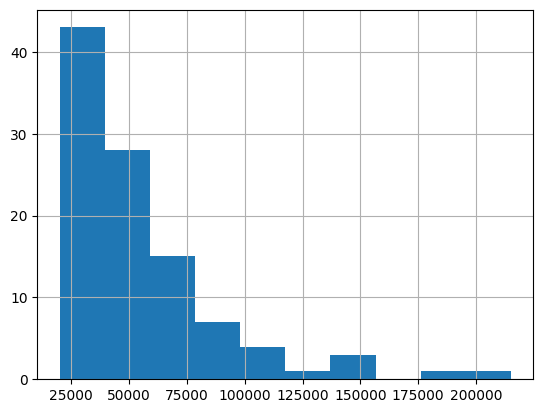

In [64]:
data['PriceEuro'].hist()

array([[<Axes: title={'center': 'AccelSec'}>,
        <Axes: title={'center': 'TopSpeed_KmH'}>],
       [<Axes: title={'center': 'Range_Km'}>,
        <Axes: title={'center': 'Efficiency_WhKm'}>],
       [<Axes: title={'center': 'Seats'}>,
        <Axes: title={'center': 'PriceEuro'}>]], dtype=object)

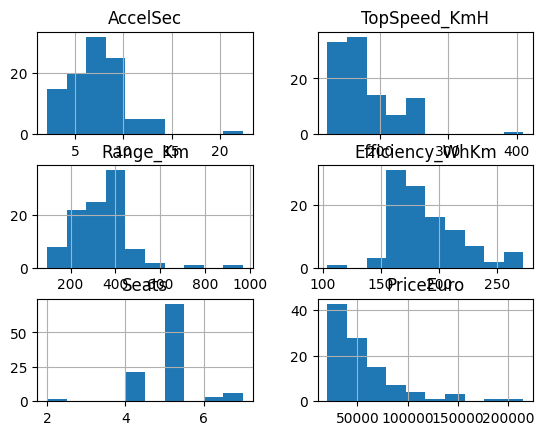

In [65]:
data.hist()

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


### Encode string variables

In [67]:
cat_columns = ['Brand', 'Model', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle', 'Segment', 'FastCharge_KmH']
encoder = LabelEncoder()
for column in cat_columns:
    data[column] = encoder.fit_transform(data[[column]].astype(str).values.ravel()) 
data

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,30,46,4.6,233,450,161,50,1,0,2,7,3,5,55480
1,31,33,10.0,160,270,167,7,1,2,2,1,2,5,30000
2,23,0,4.7,210,400,181,36,1,0,2,2,3,5,56440
3,2,101,6.8,180,360,206,32,1,2,2,6,3,5,68040
4,9,78,9.5,145,170,168,2,1,2,2,1,1,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,20,6,7.5,160,330,191,21,1,1,2,1,2,5,45000
99,1,94,4.5,210,335,258,30,1,0,2,6,4,5,96050
100,20,8,5.9,200,325,194,21,1,0,2,1,2,5,50000
101,20,10,5.1,200,375,232,22,1,0,2,1,2,5,65000


## Split the dataset for training and testing in ratio 80:20

In [68]:
X = data.drop('PriceEuro', axis=1)
Y = data['PriceEuro']

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,shuffle=True)

## Initialize the DecisionTreeRegressor model, and use the fit function for training the model.

Add values for the parameters max_depth, min_samples_split, and max_features.

Fit the model using the fit function


In [70]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=10, min_samples_split=2, max_features="sqrt")
model.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=10, max_features='sqrt')

## Predict the outcomes for X test

In [71]:
y_pred = model.predict(X_test)

## Assess the model performance, by using sklearn metrics for regression

In [72]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
print(r2_score(Y_test,y_pred))

0.7869196617035928


In [73]:
print(mean_absolute_error(Y_test,y_pred))

8823.952380952382


In [74]:
#print(mean_squared_error(Y_test,y_pred))

## Initialize the XGBRegressor model, and use the fit function

Add values for the parameters: n_estimators, max_depth, learning_rate, and set the objective to "reg:squarederror"

Fit the model using the fit function

In [75]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.5, objective="reg:squarederror" )
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Predict the outcomes for X test

In [76]:
y_pred = model.predict(X_test)

## Assess the model performance, by using sklearn metrics for regression

In [77]:
r2_score(Y_test,y_pred)

0.8287140130996704

In [78]:
mean_absolute_error(Y_test,y_pred)

np.float64(6795.614025297619)

In [79]:
mean_squared_error(Y_test,y_pred)

np.float64(176596258.49799928)

## Compare the performances of both model for at least three regression metircs

In [80]:
#XGBRegressor podobar od DecisionTreeRegressor